In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix,log_loss
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv('final_output_quora').sample(frac=0.4)
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,...,260_y,261_y,262_y,263_y,264_y,265_y,266_y,267_y,268_y,269_y,270_y,271_y,272_y,273_y,274_y,275_y,276_y,277_y,278_y,279_y,280_y,281_y,282_y,283_y,284_y,285_y,286_y,287_y,288_y,289_y,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
14087,14087,27001,27002,what is the best examples of historical fictio...,what is the best historical fiction novel,1,2,1,54,42,9,7,7.0,16.0,0.437500,3,1,0.999975,0.799984,0.999967,0.749981,0.999986,0.777769,1.0,1.0,2.0,8.0,100,87,87,74,0.604651,-109.032820,-97.407629,74.342109,-77.920851,148.725070,-75.893932,136.055814,154.123678,...,-124.429182,49.808071,189.329052,96.096385,-32.718026,7.208186,-44.668296,78.388315,-125.816344,-96.440584,-30.502762,-97.251577,24.106711,15.232790,96.468176,62.562127,25.611198,-115.976947,-54.547580,13.344231,79.344323,4.650821,59.224972,26.250095,119.194056,8.457794,49.209538,47.729559,80.726584,44.437169,93.561231,-133.692333,114.311471,69.308860,-71.408919,-65.787913,83.260792,-73.872269,-120.342304,77.529113
33426,33426,44865,61414,which is the best sap training institute in no...,which is the best sap dynpro training institut...,0,2,1,50,57,9,10,9.0,19.0,0.473684,3,1,0.999980,0.833319,0.999975,0.999975,0.999989,0.899991,1.0,1.0,1.0,9.5,100,93,93,86,0.568627,-27.848787,-7.098336,-28.925952,21.256320,103.528820,-16.948138,34.661698,95.529025,...,-19.717628,201.219843,42.861119,132.337538,48.397072,-74.247057,-69.569330,95.739149,-94.253293,-41.422454,54.386444,42.801528,-14.263522,-53.185140,39.279749,-96.316189,94.611297,-49.478258,-39.949289,120.454328,90.220903,-15.740336,75.978801,-76.732760,107.652113,-23.312551,21.638310,91.299268,-41.578343,-6.206955,47.890133,-6.670233,49.945276,-15.288929,-99.862597,15.189670,22.311451,-90.241905,-50.475635,33.731722
296091,296091,418241,18054,can i make 18 million a year as a day trader,can i make 10 million a year as a day trader,0,1,3,45,45,11,11,9.0,20.0,0.450000,4,2,0.833319,0.833319,0.999975,0.999975,0.818174,0.818174,1.0,1.0,0.0,11.0,98,98,98,98,0.695652,-144.296864,-109.366791,-106.978807,8.865211,171.063769,7.348125,87.191450,177.620263,...,-82.988502,253.096682,44.562798,-20.597088,73.338960,16.476043,48.423616,28.305002,-151.544483,126.438411,70.208442,105.127922,-103.043857,-101.208030,-128.056280,-7.468084,-80.847768,-55.264591,-66.387743,4.490836,211.478489,-59.082535,54.905569,60.801129,72.189633,-95.606909,-41.026002,42.933379,-248.051517,13.555646,-18.243698,-53.106353,-135.209731,80.214436,-67.823957,123.099609,111.494500,-62.412858,-19.200716,5.159307
257328,257328,372614,372615,why do i always feel stressed and overwhelmed,i can not make networking between computer and...,0,1,1,46,52,8,8,2.0,16.0,0.125000,2,0,0.000000,0.000000,0.499988,0.399992,0.249997,0.222220,0.0,0.0,1.0,8.5,41,37,37,42,0.106383,-15.035183,48.440704,-133.797202,-87.095304,-5.365591,-19.414516,60.892918,187.242528,...,-37.899792,231.107365,-32.438430,2.113202,80.208926,39.449635,2.125774,62.870224,-122.894613,-39.434757,14.724603,-57.843430,18.458375,-58.313304,-20.100068,-123.609802,64.874331,-111.060373,-61.817218,108.047239,46.703538,-18.871865,66.439307,3.581950,67.462922,34.776153,30.821405,118.504596,-107.393280,-16.206707,-47.405211,-48.192799,-16.253406,-39.259993,-20.672257,-30.717087,-24.175564,-87.114943,-48.569705,48.273784
263107,263107,379596,379597,is mdi gurgaon worth spending 16 lacs in fees,does mdi gurgaon look into the past academic b...,0,1,1,46,75,9,12,2.0,21.0,0.095238,2,0,0.285710,0.249997,0.000000,0.000000,0.222220,0.166665,0.0,0.0,3.0,10.5,50,45,47,54,0.297872,19.084751,-69.136076,-155.205315,-66.901529,201.756412,-9.889698,-6.9687

In [7]:
data.shape

(161716, 632)

In [8]:
data['is_duplicate'].value_counts()/data.shape[0]

is_duplicate
0    0.631354
1    0.368646
Name: count, dtype: float64

In [9]:
columns_to_be_drop=['id','qid1','qid2','question1','question2']
target_column='is_duplicate'

In [10]:
X=data.drop(columns=columns_to_be_drop+[target_column])
y=data[target_column]

In [11]:
X.shape,y.shape

((161716, 626), (161716,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [13]:
print("="*10, "Distribution of output variable in train data", "="*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("="*10, "Distribution of output variable in train data", "="*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

========== Distribution of output variable in train data ==========
Class 0:  0.6313537312325311 Class 1:  0.3686462687674689
========== Distribution of output variable in train data ==========
Class 0:  0.3686462687674689 Class 1:  0.3686462687674689


In [14]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

## Random model

Log loss on Test Data using Random Model 0.8823490305943356


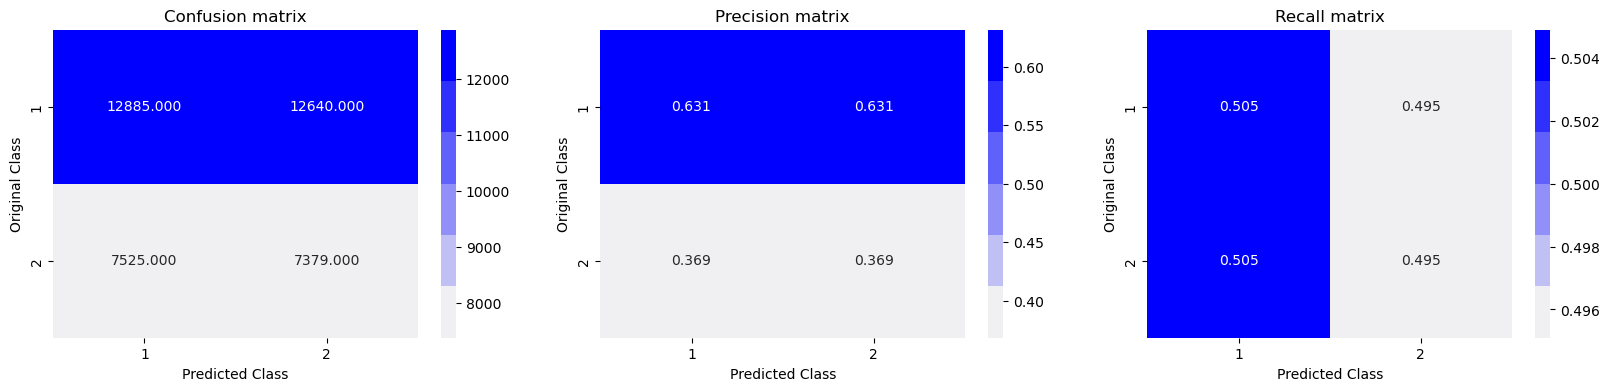

In [16]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

## Logistic Regression

In [18]:
standard_scala=StandardScaler()
scaled_X_train=standard_scala.fit_transform(X_train)
scaled_X_test=standard_scala.transform(X_test)

In [19]:
%%time
lr_model=LogisticRegression()
lr_model.fit(scaled_X_train,y_train)

CPU times: user 46 s, sys: 3.19 s, total: 49.2 s
Wall time: 7.75 s


LogisticRegression()

==================== TRAIN DATA PREDICTION ====================
Logg loss on train data using Logistic Regression 0.38795104235857475


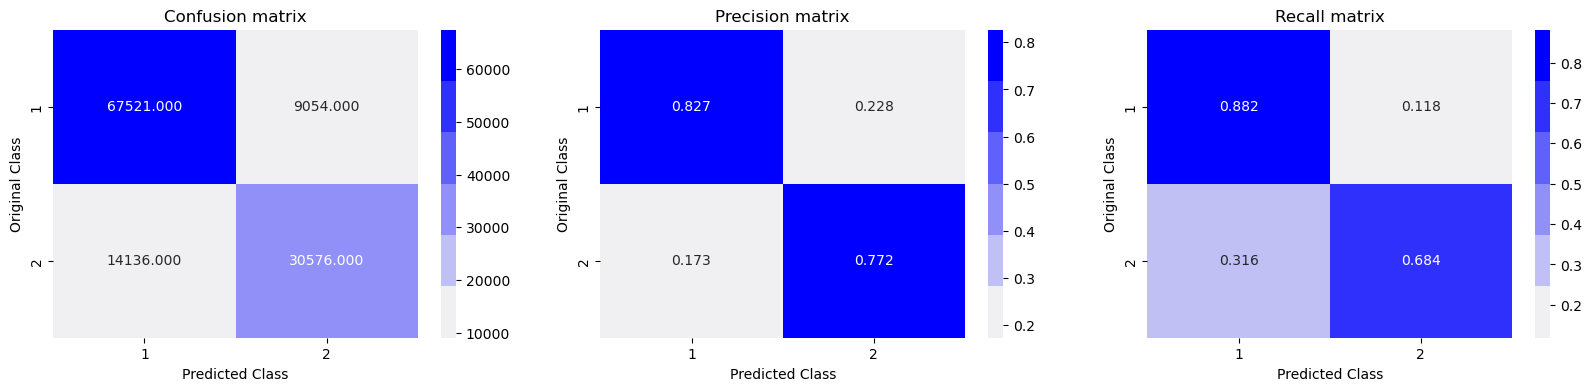

In [20]:
print("=="*10,'TRAIN DATA PREDICTION','=='*10)
train_preds=lr_model.predict(scaled_X_train)
train_preds_prob=lr_model.predict_proba(scaled_X_train)
print("Logg loss on train data using Logistic Regression",log_loss(y_train,train_preds_prob))
plot_confusion_matrix(y_train,train_preds)

==================== TEST DATA PREDICTION ====================
Logg loss on test data using Logistic Regression 0.3906882657841529


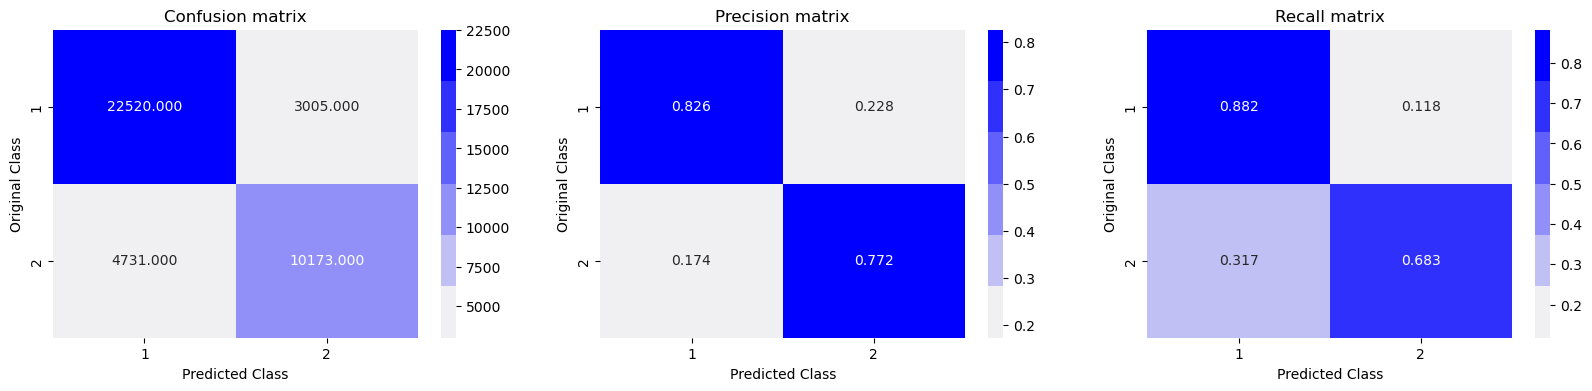

In [21]:
print("=="*10,'TEST DATA PREDICTION','=='*10)
test_preds=lr_model.predict(scaled_X_test)
test_preds_prob=lr_model.predict_proba(scaled_X_test)
print("Logg loss on test data using Logistic Regression",log_loss(y_test,test_preds_prob))
plot_confusion_matrix(y_test,test_preds)

## XGB

In [23]:
%%time
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)

CPU times: user 1min 18s, sys: 9.97 s, total: 1min 28s
Wall time: 13.6 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

==================== TRAIN DATA PREDICTION ====================
Logg loss on train data using XGBoost 0.21618749251064007


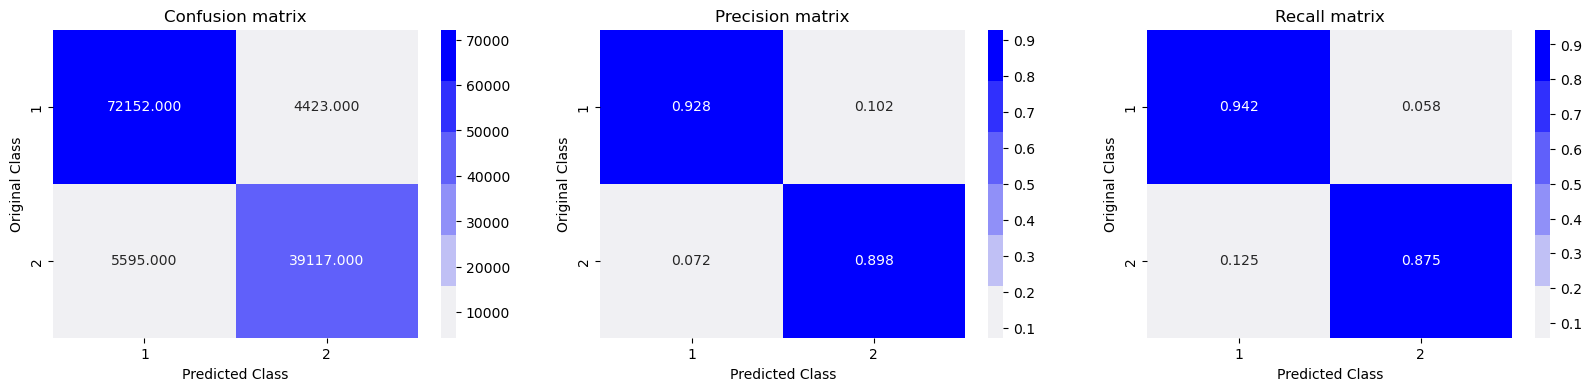

In [24]:
print("=="*10,'TRAIN DATA PREDICTION','=='*10)
train_preds=xgb_model.predict(X_train)
train_preds_prob=xgb_model.predict_proba(X_train)
print("Logg loss on train data using XGBoost",log_loss(y_train,train_preds_prob))
plot_confusion_matrix(y_train,train_preds)

==================== TEST DATA PREDICTION ====================
Logg loss on test data using XGBoost  0.3239035771367273


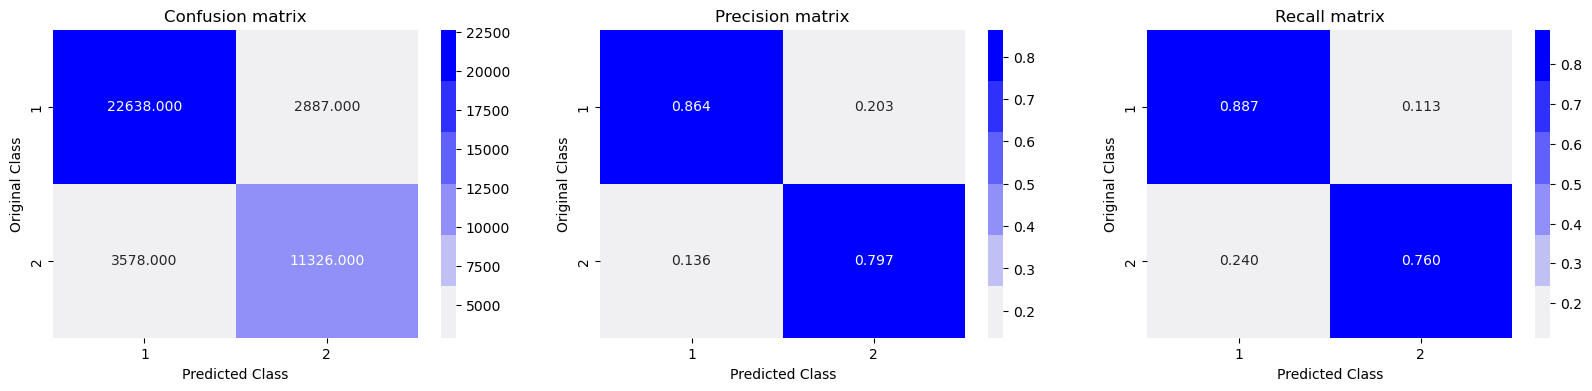

In [25]:
print("=="*10,'TEST DATA PREDICTION','=='*10)
test_preds=xgb_model.predict(X_test)
test_preds_prob=xgb_model.predict_proba(X_test)
print("Logg loss on test data using XGBoost ",log_loss(y_test,test_preds_prob))
plot_confusion_matrix(y_test,test_preds)

## LGBM

In [27]:
%%time
lgb_model=LGBMClassifier()
lgb_model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 44712, number of negative: 76575
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.248830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 156002
[LightGBM] [Info] Number of data points in the train set: 121287, number of used features: 626
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368646 -> initscore=-0.538029
[LightGBM] [Info] Start training from score -0.538029
CPU times: user 1min 19s, sys: 12 s, total: 1min 31s
Wall time: 16.2 s


LGBMClassifier()

==================== TRAIN DATA PREDICTION ====================
Logg loss on train data using LGBM model 0.3027273809497671


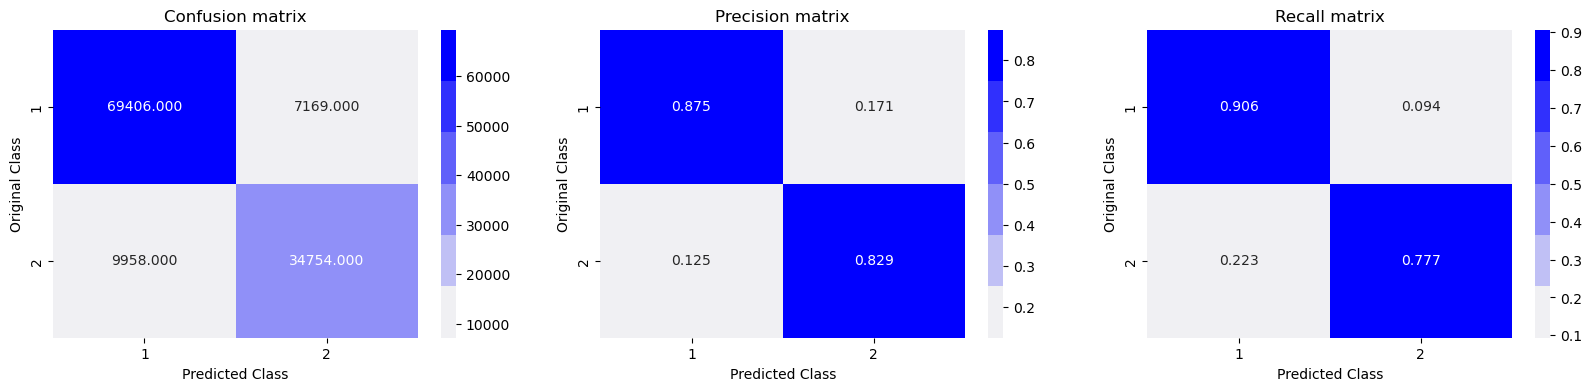

In [28]:
print("=="*10,'TRAIN DATA PREDICTION','=='*10)
train_preds=lgb_model.predict(X_train)
train_preds_prob=lgb_model.predict_proba(X_train)
print("Logg loss on train data using LGBM model",log_loss(y_train,train_preds_prob))
plot_confusion_matrix(y_train,train_preds)

==================== TEST DATA PREDICTION ====================
Logg loss on test data using LGBM model  0.3283751661723824


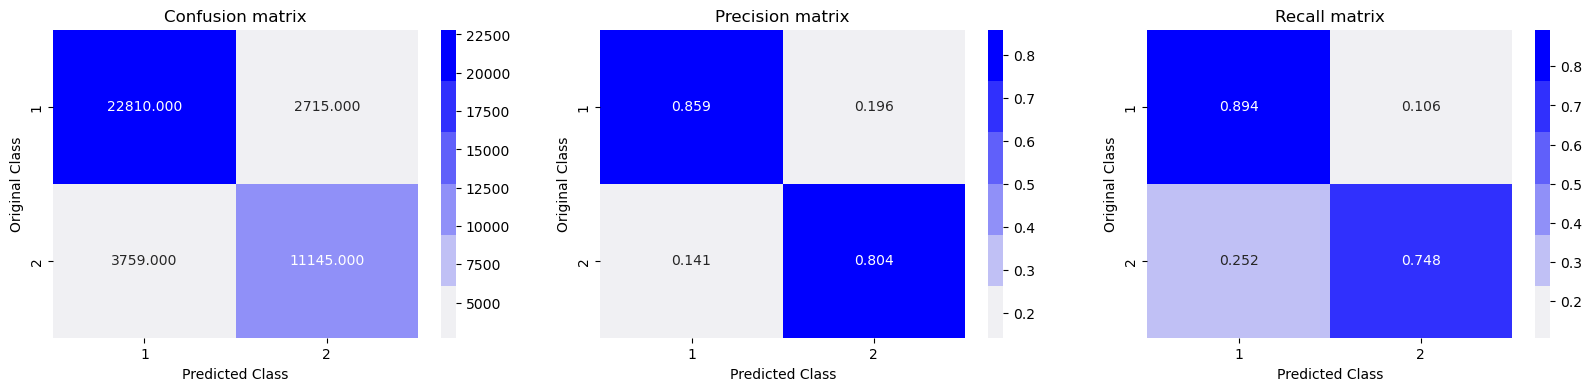

In [29]:
print("=="*10,'TEST DATA PREDICTION','=='*10)
test_preds=lgb_model.predict(X_test)
test_preds_prob=lgb_model.predict_proba(X_test)
print("Logg loss on test data using LGBM model ",log_loss(y_test,test_preds_prob))
plot_confusion_matrix(y_test,test_preds)